In [1]:
### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0532.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0282.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1401.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0914.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0691.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0972.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0818.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0463.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0930.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1323.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1347.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1354.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0704.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score


In [3]:
import io 
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

Train Test Split Folder path


In [4]:
x_train = []
y_train = []

image_size = 150

labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size,image_size))
        x_train.append(img)
        y_train.append(i)
        
        
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size,image_size))
        x_train.append(img)
        y_train.append(i)
    
x_train = np.array(x_train) 
y_train = np.array(y_train)
    

In [5]:
x_train,y_train = shuffle(x_train, y_train,random_state = 101)
x_train.shape

(3264, 150, 150, 3)

Train Test Split Training

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train, test_size=0.1, random_state = 101)

In [7]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Convolutional Neural Network

In [8]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(Conv2D(64, (3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3,3),activation = 'relu'))
model.add(Conv2D(64, (3,3),activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3),activation = 'relu'))
model.add(Conv2D(128, (3,3),activation = 'relu'))
model.add(Conv2D(128, (3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3),activation = 'relu'))
model.add(Conv2D(256, (3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(4,activation = 'softmax'))



/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss='categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [11]:
history = model.fit(x_train,y_train,epochs=20,validation_split =0.1)

Epoch 1/20


I0000 00:00:1733593555.616160      93 service.cc:145] XLA service 0x7bd8ec005510 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733593555.616219      93 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 5/83 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.2101 - loss: 9.7956 

I0000 00:00:1733593569.403347      93 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


83/83 ━━━━━━━━━━━━━━━━━━━━ 33s 197ms/step - accuracy: 0.2724 - loss: 2.8453 - val_accuracy: 0.2891 - val_loss: 1.3415
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.4075 - loss: 1.2554 - val_accuracy: 0.5306 - val_loss: 0.9410
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.5906 - loss: 0.9840 - val_accuracy: 0.6361 - val_loss: 0.8834
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.6197 - loss: 0.8653 - val_accuracy: 0.6769 - val_loss: 0.7296
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.6870 - loss: 0.7435 - val_accuracy: 0.6224 - val_loss: 0.8161
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.6998 - loss: 0.6937 - val_accuracy: 0.7925 - val_loss: 0.5443
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7712 - loss: 0.5525 - val_accuracy: 0.8027 - val_loss: 0.5027
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7976 - loss: 0.4858 - val_accuracy: 0.8095 - val_loss: 

In [12]:
# Save model
model.save('brain_tumor_classifier.h5')

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

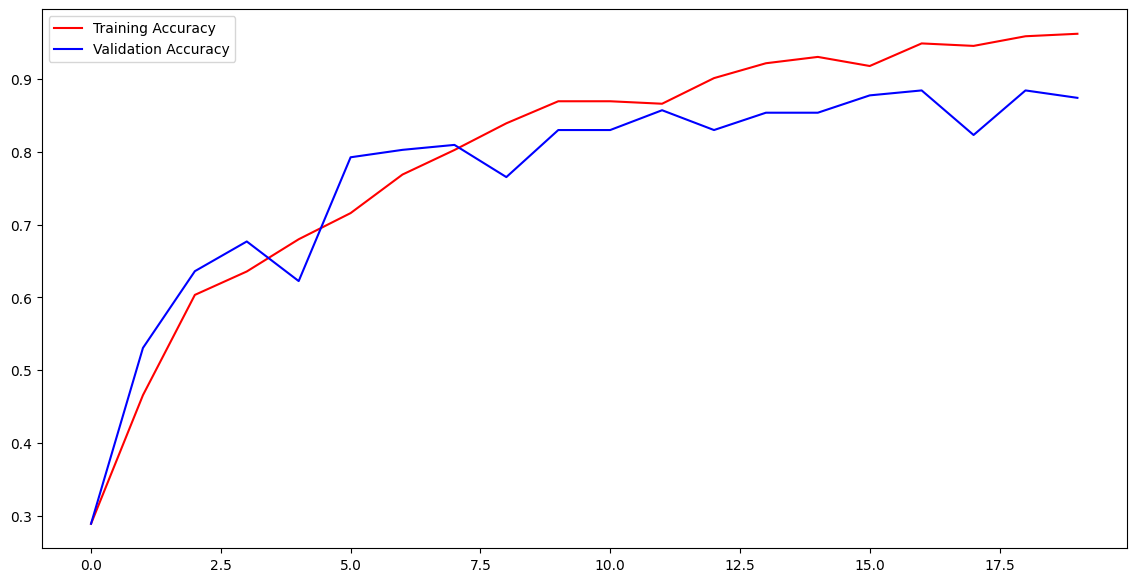

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

fig = plt.figure(figsize = (14,7))
plt.plot(epochs,acc,'r', label = 'Training Accuracy')
plt.plot(epochs,val_acc,'b', label = 'Validation Accuracy')
plt.legend(loc='upper left')
plt.show()


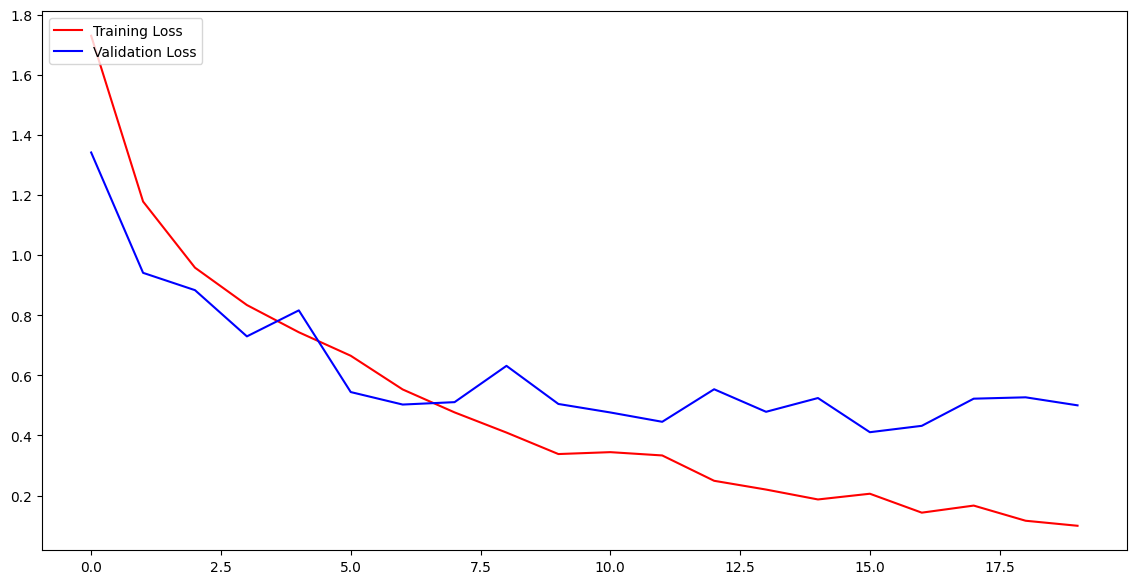

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig = plt.figure(figsize = (14,7))
plt.plot(epochs,loss,'r', label = 'Training Loss')
plt.plot(epochs,val_loss,'b', label = 'Validation Loss')
plt.legend(loc='upper left')
plt.show()


Prediction

In [16]:
def pred(img_add):
    img = cv2.imread(img_add)
    img = cv2.resize(img,(150,150))
    
    img_array = np.array(img)
    print(img_array.shape)
    img_array = img.reshape(1,150,150,3)
    a = model.predict(img_array)
    indices = a.argmax()

    if indices == 0:
        return "Glioma Tumor"
    elif indices == 1:
        return "Meningioma Tumor"
    elif indices == 2:
        return "No Tumor"
    elif indices == 3:
        return "Pituitary Tumor"
    else:
        return "Wrong_Choice!"

In [17]:
#Same dataset
#img_add = '/kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor/image(12).jpg'

# Internet Images
#img_add = '/kaggle/input/brain-tumor-internet/internet images/no.jpg'
#img_add = '/kaggle/input/brain-tumor-internet/internet images/meningioma.jpg'
#img_add = '/kaggle/input/brain-tumor-internet/internet images/glioma.jpg'


#Diff dataset
#img_add = '/kaggle/input/brain-tumor-mri-dataset/Testing/meningioma/Te-meTr_0000.jpg'
#img_add = '/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0019.jpg'
#img_add = '/kaggle/input/brain-tumor-mri-dataset/Testing/notumor/Te-no_0018.jpg'
img_add = '/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary/Te-pi_0021.jpg'
out = pred(img_add)
print(out)


(150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step
Pituitary Tumor


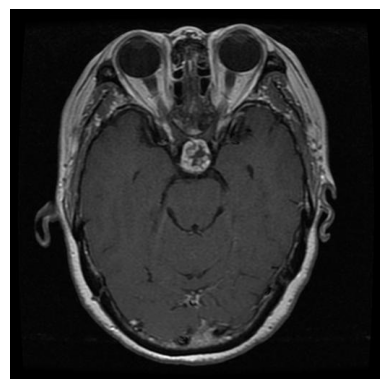

In [18]:
from tensorflow.keras.preprocessing import image
img = image.load_img(img_add)
plt.axis('off')
plt.imshow(img)